In [6]:
# Import Data Science libraries
import pandas as pd
import numpy as np
from scipy.stats import linregress
# Import Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Import requests
import requests
import json
import time
from pprint import pprint

In [7]:
# Study data files
Countries_AQI_datapath = "Research/AQI and Lat Long of Countries.csv"
continent_mapping_datapath ="Research/Countries by continents.csv"
# Read in the csv
Countries_AQI = pd.read_csv(Countries_AQI_datapath)
continent_mapping_data=pd.read_csv(continent_mapping_datapath)

In [8]:
Countries_AQI.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [9]:
Countries_AQI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [10]:
Countries_AQI_data=Countries_AQI.dropna(subset=["Country"])

In [11]:
Countries_AQI_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16393 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16393 non-null  object 
 2   AQI Value           16393 non-null  int64  
 3   AQI Category        16393 non-null  object 
 4   CO AQI Value        16393 non-null  int64  
 5   CO AQI Category     16393 non-null  object 
 6   Ozone AQI Value     16393 non-null  int64  
 7   Ozone AQI Category  16393 non-null  object 
 8   NO2 AQI Value       16393 non-null  int64  
 9   NO2 AQI Category    16393 non-null  object 
 10  PM2.5 AQI Value     16393 non-null  int64  
 11  PM2.5 AQI Category  16393 non-null  object 
 12  lat                 16393 non-null  float64
 13  lng                 16393 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.9+ MB


In [12]:
# Drop duplicate cities
duplicate_AQI_data = Countries_AQI_data[Countries_AQI_data.duplicated(subset=['City','Country'])]
duplicate_AQI_data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
6,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,26.8941,-82.0513
21,United States of America,Pontiac,77,Moderate,2,Good,22,Good,15,Good,77,Moderate,40.8894,-88.6409
34,United States of America,Dayton,45,Good,1,Good,32,Good,7,Good,45,Good,39.2592,-119.5653
35,United States of America,Dayton,45,Good,1,Good,32,Good,7,Good,45,Good,30.0315,-94.9158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16647,United States of America,Salina,51,Moderate,1,Good,34,Good,1,Good,51,Moderate,43.1023,-76.1768
16672,United States of America,Union,51,Moderate,1,Good,47,Good,2,Good,51,Moderate,42.1258,-76.0329
16673,United States of America,Union,51,Moderate,1,Good,47,Good,2,Good,51,Moderate,38.4399,-90.9927
16685,Colombia,Viterbo,55,Moderate,1,Good,24,Good,0,Good,55,Moderate,5.0667,-75.8833


In [13]:
# Dropping Duplicates
AQI_data_cleaned = Countries_AQI_data.drop_duplicates(subset=["City", "Country"], keep="first")
AQI_data_cleaned


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16689,China,Shaoguan,160,Unhealthy,3,Good,160,Unhealthy,1,Good,79,Moderate,24.8011,113.5927
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [14]:
# Merge CSVs (Adding Continent to dataset)

In [15]:
continent_mapping_data.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [16]:
continent_mapping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  196 non-null    object
 1   Country    196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [17]:

AQI_data_cleaned= AQI_data_cleaned.rename(columns={
                                            'AQI Value':'Air_Quality_Value',
                                            'AQI Category':'Air_Quality_Category',
                                            'CO AQI Value':'CO_AQI_Value',
                                            'CO AQI Category':'CO_AQI_Category',
                                            'Ozone AQI Value':'Ozone_AQI_Value',
                                            'Ozone AQI Category':'Ozone_AQI_Category',
                                            'NO2 AQI Value':'NO2_AQI_Value',
                                            'NO2 AQI Category':'NO2_AQI_Category',
                                            'PM2.5 AQI Value':'PM2.5_AQI_Value',
                                            'PM2.5 AQI Category':'PM2.5_AQI_Category',
                                            'lat': 'Latitude',
                                            'lng': 'Longitude'
})

In [18]:
AQI_data_cleaned.head()

,Country,City,Air_Quality_Value,Air_Quality_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category,Latitude,Longitude
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074


In [19]:
# Replace missing values in the 'Country' column with 'Unknown'
AQI_data_cleaned['Country'] = AQI_data_cleaned['Country'].fillna('Unknown')
AQI_data_cleaned

,Country,City,Air_Quality_Value,Air_Quality_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category,Latitude,Longitude
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16689,China,Shaoguan,160,Unhealthy,3,Good,160,Unhealthy,1,Good,79,Moderate,24.8011,113.5927
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [20]:
# Dictionary for standardizing country names
standard_country_names = {
    'United States of America': 'United States',
    'Russian Federation': 'Russia',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Viet Nam': 'Vietnam',
    'Myanmar':'Burma (Myanmar)',
    'United Republic of Tanzania':'Tanzania',
    'Democratic Republic of the Congo':'Congo',
    'Bolivia(Plurinational State of)':'Bolivia',
    'Venezuela(Bolivarian Republic of)':'Venezuela',
    'Burkina Faso':'Burkina',
    "Côte d'Ivoire" : 'Ivory Coast',
    'Iran (Islamic Republic of)' : 'Iran',
    'Cabo Verde' : 'Cape Verde',
    'Republic of North Macedonia' : 'Macedonia',
    'North Macedonia' : 'Macedonia',
    'Republic of Moldova' : 'Moldova',
    "Lao People's Democratic Republic" : 'Laos',
    'State of Palestine' : 'Palestine',
    'Syrian Arab Republic' : 'Syria',
    'Kingdom of Eswatini' :'Swaziland',
    'Eswatini' :'Swaziland',
    'Republic of Korea':'South Korea',
    'Aruba' : 'Aruba',
    'State of Palestine': 'Palestine',
    'Palestine': 'Palestine'
    # Add more mappings if needed
}
# Apply the mapping to DataFrames to standardize country names
AQI_data_cleaned['Country'] = AQI_data_cleaned['Country'].map(standard_country_names).fillna(AQI_data_cleaned['Country'])

In [21]:
AQI_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13956 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               13956 non-null  object 
 1   City                  13956 non-null  object 
 2   Air_Quality_Value     13956 non-null  int64  
 3   Air_Quality_Category  13956 non-null  object 
 4   CO_AQI_Value          13956 non-null  int64  
 5   CO_AQI_Category       13956 non-null  object 
 6   Ozone_AQI_Value       13956 non-null  int64  
 7   Ozone_AQI_Category    13956 non-null  object 
 8   NO2_AQI_Value         13956 non-null  int64  
 9   NO2_AQI_Category      13956 non-null  object 
 10  PM2.5_AQI_Value       13956 non-null  int64  
 11  PM2.5_AQI_Category    13956 non-null  object 
 12  Latitude              13956 non-null  float64
 13  Longitude             13956 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.6+ MB


In [22]:
cities_continents_merged = AQI_data_cleaned.merge(continent_mapping_data, on='Country', how='left')
cities_continents_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13956 entries, 0 to 13955
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               13956 non-null  object 
 1   City                  13956 non-null  object 
 2   Air_Quality_Value     13956 non-null  int64  
 3   Air_Quality_Category  13956 non-null  object 
 4   CO_AQI_Value          13956 non-null  int64  
 5   CO_AQI_Category       13956 non-null  object 
 6   Ozone_AQI_Value       13956 non-null  int64  
 7   Ozone_AQI_Category    13956 non-null  object 
 8   NO2_AQI_Value         13956 non-null  int64  
 9   NO2_AQI_Category      13956 non-null  object 
 10  PM2.5_AQI_Value       13956 non-null  int64  
 11  PM2.5_AQI_Category    13956 non-null  object 
 12  Latitude              13956 non-null  float64
 13  Longitude             13956 non-null  float64
 14  Continent             13878 non-null  object 
dtypes: float64(2), int6

In [23]:
#Heat Map Dataframe of AQI values vs Pollutants
HM_df = cities_continents_merged[['Air_Quality_Value', 'CO_AQI_Value','Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']]
print(HM_df)

       Air_Quality_Value  CO_AQI_Value  Ozone_AQI_Value  NO2_AQI_Value  \
0                     51             1               36              0   
1                     41             1                5              1   
2                     66             1               39              2   
3                     34             1               34              0   
4                     54             1               14             11   
...                  ...           ...              ...            ...   
13951                160             3              160              1   
13952                 54             1               34              5   
13953                 71             1               39              1   
13954                 50             1               20              5   
13955                 71             1               44              2   

       PM2.5_AQI_Value  
0                   51  
1                   41  
2                   66  
3          

In [29]:
#Create Correlation Matrix
corr_matrix = HM_df.corr()
print(corr_matrix)


                   Air_Quality_Value  CO_AQI_Value  Ozone_AQI_Value  \
Air_Quality_Value           1.000000      0.495144         0.348281   
CO_AQI_Value                0.495144      1.000000         0.074985   
Ozone_AQI_Value             0.348281      0.074985         1.000000   
NO2_AQI_Value               0.308366      0.433509        -0.229369   
PM2.5_AQI_Value             0.979874      0.493940         0.252082   

                   NO2_AQI_Value  PM2.5_AQI_Value  
Air_Quality_Value       0.308366         0.979874  
CO_AQI_Value            0.433509         0.493940  
Ozone_AQI_Value        -0.229369         0.252082  
NO2_AQI_Value           1.000000         0.339855  
PM2.5_AQI_Value         0.339855         1.000000  


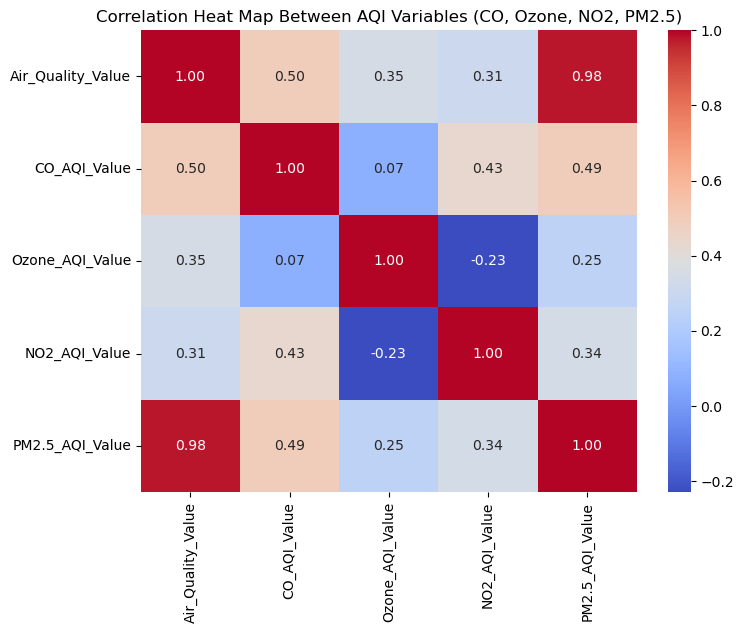

In [32]:
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heat Map Between AQI Variables (CO, Ozone, NO2, PM2.5)')
plt.show()

In [33]:
#Scatter plot
PM_df = cities_continents_merged[['Air_Quality_Value', 'PM2.5_AQI_Value']]
print(PM_df)

       Air_Quality_Value  PM2.5_AQI_Value
0                     51               51
1                     41               41
2                     66               66
3                     34               20
4                     54               54
...                  ...              ...
13951                160               79
13952                 54               54
13953                 71               71
13954                 50               50
13955                 71               71

[13956 rows x 2 columns]


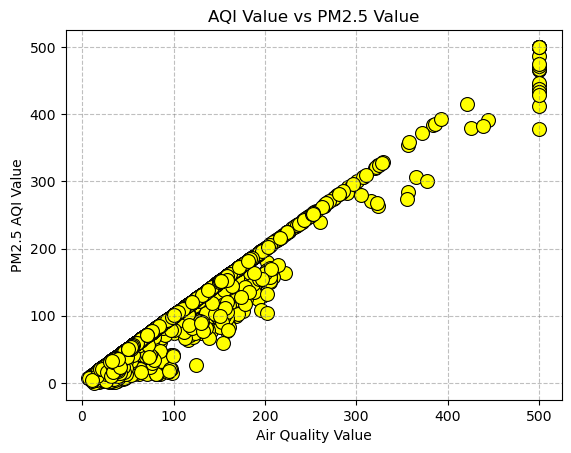

In [69]:
sns.scatterplot(x='Air_Quality_Value', y='PM2.5_AQI_Value', data=PM_df, color='yellow',edgecolor='black', s=100)  # `s` controls marker size
plt.title('AQI Value vs PM2.5 Value')
plt.xlabel('Air Quality Value')
plt.ylabel('PM2.5 AQI Value')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.show()

In [42]:

# Fit a linear regression
coefficients = np.polyfit(PM_df['Air_Quality_Value'], PM_df['PM2.5_AQI_Value'], deg=1)  # Degree 1 for linear regression
slope, intercept = coefficients

# Print the equation
print(f"Regression equation: Y = {slope:.2f}X + {intercept:.2f}")

Regression equation: Y = 0.98X + -2.18


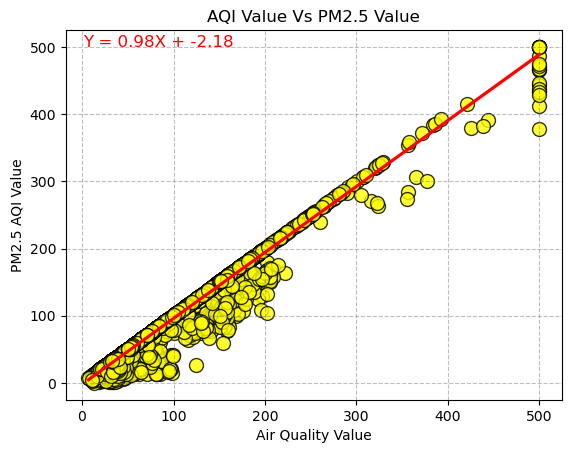

In [67]:
# Fit the regression model
coefficients = np.polyfit(PM_df['Air_Quality_Value'], PM_df['PM2.5_AQI_Value'], 1)  # Linear regression (degree=1)
slope, intercept = coefficients

# Scatterplot with regression line
sns.regplot(x='Air_Quality_Value', y='PM2.5_AQI_Value', data=PM_df, scatter_kws={'s': 100, 'color':'yellow','edgecolor': 'black'}, line_kws={'color': 'red'})

# Add the regression equation as text
plt.text(1, 500, f"Y = {slope:.2f}X + {intercept:.2f}", fontsize=12, color='red')


plt.title('AQI Value Vs PM2.5 Value')
plt.xlabel('Air Quality Value')
plt.ylabel('PM2.5 AQI Value')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.show()

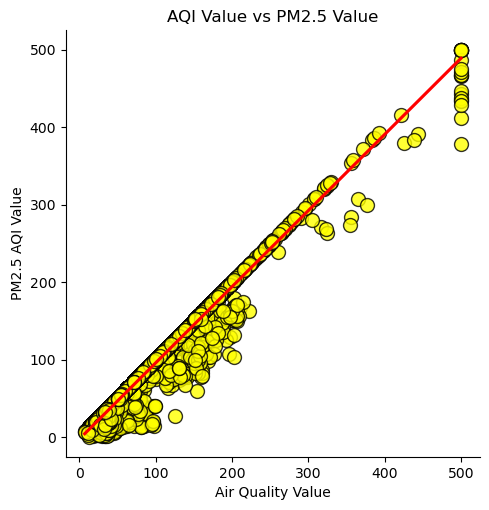

In [70]:
sns.lmplot(x='Air_Quality_Value', y='PM2.5_AQI_Value', data=PM_df, ci=.99, scatter_kws={'s': 100, 'color': 'yellow','edgecolor': 'black'}, line_kws={'color': 'red'})
plt.title('AQI Value vs PM2.5 Value')
plt.xlabel('Air Quality Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

In [ ]:
# Correlatio